CS 28150 HW 4

Zack Wang

There are two main parts to this project: making a guess using the adjusted Euler Method, and adjusting the timestep. 

The Euler method is relatively straightforward. We take in a particular (t, y) point, a timestep, and produce a new point. 
By generalizing this, the Euler method takes in a time value t and a vector y, producing a new vector. 

The timestep will be adjusted by running the Euler method for one step, evaluating the result, then seeing if we need to try again.

The graphs of the "true" functions will be a line, and scatterplots of the estimated values will be on top. There are two main sections: tests with exponentials and the comet problem.

In [286]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('seaborn-whitegrid')

class simTime:
    time = 0
    dt = 1
    tol = .1
    agrow = 1.25
    ashrink = .8
    dtmin = .2
    dtmax = 2
    endTime = 5
    stepsSinceRejection = 0
    stepsRejected = 0
    stepsAccepted = 0
    def __init__(self, t, tol, agrow, ashrink, dtmin, dtmax, endt):
        self.time = t
        self.tol = tol
        self.agrow = agrow
        self.ashrink = ashrink
        self.dtmin = dtmin
        self.dt = dtmin
        self.dtmax = dtmax
        self.endTime = endt

    def successStep(self):
        self.time += self.dt
        self.stepsSinceRejection += 1
        if self.stepsSinceRejection > 3:
            potential = self.agrow * self.dt
            if potential > self.dtmax:
                self.dt = self.dtmax
            elif potential < self.dtmin:
                self.dt = self.dtmin
            else:
                self.dt = potential
            #need something here, set dt to end up exactly at self.edntime if necessary
            if (self.time + self.dt) > self.endTime:
                self.dt = self.endTime - self.time
        self.stepsAccepted += 1

    def cautiousStep(self):
        self.time += self.dt
        self.stepsSinceRejection += 1
        potential = self.ashrink * self.dt
        if potential > self.dtmax:
            self.dt = self.dtmax
        elif potential < self.dtmin:
            self.dt = self.dtmin
        else:
            self.dt = potential
        if (self.time + self.dt) > self.endTime:
                self.dt = self.endTime - self.time
        self.stepsAccepted += 1

    def takeIt(self):
        self.time += self.dt
        self.stepsAccepted += 1

    def failedStep(self):
        self.dt /= 2
        self.stepsSinceRejection = 0
        self.stepsRejected += 1

        


def step1(y, t, dt, f):
    #copmutes straightforward euler, f is the change of value
    w = np.add(y, (dt * f(t, y)) )
    return w

def step2(y, t, dt, f):
    initalGuess = step1(y, t, dt, f)
    wHalfway = step1(y, t, dt/2, f)
    wRest = step1(wHalfway, t + (dt / 2), dt/2, f)
    ddy = wRest - initalGuess
    w = wRest + ddy
    return w

def step3(y, t, dt, f):
    initalGuess = step2(y, t, dt, f)
    wHalfway = step2(y, t, dt/2, f)
    wRest = step2(wHalfway, t + (dt / 2), dt/2, f)
    ddy = wRest - initalGuess
    w = wRest + (ddy/3)
    return w, np.linalg.norm(ddy)

def chart(startt, starty, end, foo, st):
    #traverses the whole thing
    xs = []
    ys = []
    t = startt
    y = starty
    ys.append(y)
    xs.append(t)
    while (st.time < end):
        #print(st.time, st.dt)
        testStep, err = step3(y, st.time, st.dt, foo) 
        if err < st.tol:
            #print(err)
            if err > (.75 * st.tol):
                #print("close enough")
                st.cautiousStep()
                ys.append(testStep)
                xs.append(st.time)
                y = testStep
            else:
                st.successStep()
                ys.append(testStep)
                xs.append(st.time)
                y = testStep
        
        else:
            #print("fail") #need something here in case we just say fuck it, need to still update y
            if st.dt == st.dtmin:
                st.takeIt()
                ys.append(testStep)
                xs.append(st.time)
                y = testStep
            else:
                st.failedStep()
    return xs, ys, st
    

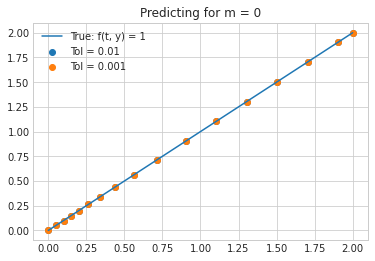

In [287]:
def basicFunc(t, y):
    return 1
notstrict = simTime(0, .01, 1.25, .8, .05, .2, 2)
strict = simTime(0, .001, 1.25, .8, .05, .2, 2)
testx1, testy1, testst1 = chart(0, 0, 2, basicFunc, notstrict)
testx12, testy12, testst12 = chart(0, 0, 2, basicFunc, strict)
xSet = np.linspace(0, 2, 100)
ySet = xSet
fig = plt.figure()
ax = plt.axes()
plt.plot(xSet, ySet, label = "True: f(t, y) = 1")
plt.scatter(testx1, testy1, label = 'Tol = 0.01')
plt.scatter(testx12, testy12, label = 'Tol = 0.001')
plt.title("Predicting for m = 0")
plt.legend()

Text(0.5, 1.0, 'Predicting for m = 1')

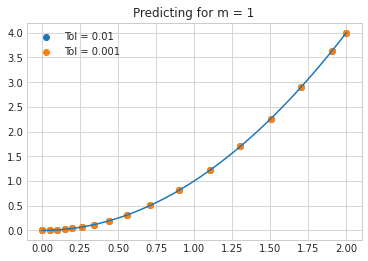

In [288]:
def basicFunc2(t, y):
    return 2 * (t)

notstrict = simTime(0, .01, 1.25, .8, .05, .2, 2)
strict = simTime(0, .001, 1.25, .8, .05, .2, 2)
testx2, testy2, testst2 = chart(0, 0, 2, basicFunc2, notstrict)
testx22, testy22, testst22 = chart(0, 0, 2, basicFunc2, strict)


xSet = np.linspace(0, 2, 100)
ySet = xSet ** 2
fig = plt.figure()
ax = plt.axes()
plt.plot(xSet, ySet)
plt.scatter(testx2, testy2, label = 'Tol = 0.01')
plt.scatter(testx22, testy22, label = 'Tol = 0.001')
plt.legend()
plt.title("Predicting for m = 1")

Text(0.5, 1.0, 'Predicting for m = 2')

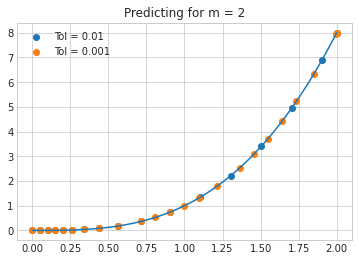

In [289]:
def basicFunc3(t, y):
    return 3 * (t ** 2)

notstrict = simTime(0, .01, 1.25, .8, .05, .2, 2)
strict = simTime(0, .001, 1.25, .8, .05, .2, 2)
testx3, testy3, testst3 = chart(0, 0, 2, basicFunc3, notstrict)
testx32, testy32, testst32 = chart(0, 0, 2, basicFunc3, strict)


xSet = np.linspace(0, 2, 100)
ySet = xSet ** 3
fig = plt.figure()
ax = plt.axes()
plt.plot(xSet, ySet)
plt.scatter(testx3, testy3, label = 'Tol = 0.01')
plt.scatter(testx32, testy32, label = 'Tol = 0.001')
plt.legend()
plt.title("Predicting for m = 2")

Text(0.5, 1.0, 'Predicting for m = 3')

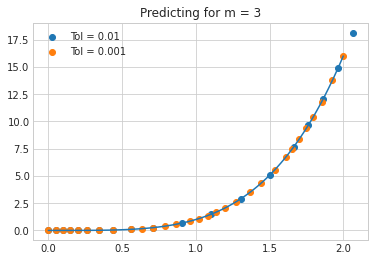

In [290]:
def basicFunc4(t, y):
    return 4 * (t ** 3)

notstrict = simTime(0, .01, 1.25, .8, .05, .2, 2)
strict = simTime(0, .001, 1.25, .8, .05, .2, 2)
testx4, testy4, testst4 = chart(0, 0, 2, basicFunc4, notstrict)
testx42, testy42, testst42 = chart(0, 0, 2, basicFunc4, strict)


xSet = np.linspace(0, 2, 100)
ySet = xSet ** 4
fig = plt.figure()
ax = plt.axes()
plt.plot(xSet, ySet)
plt.scatter(testx4, testy4, label = 'Tol = 0.01')
plt.scatter(testx42, testy42, label = 'Tol = 0.001')
plt.legend()
plt.title("Predicting for m = 3")

Text(0.5, 1.0, 'Predicting for m = 4')

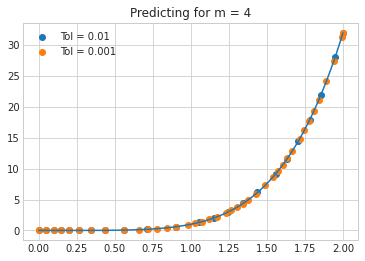

In [291]:
def basicFunc5(t, y):
    return 5 * (t ** 4)

notstrict = simTime(0, .01, 1.25, .8, .05, .2, 2)
strict = simTime(0, .001, 1.25, .8, .05, .2, 2)
testx5, testy5, testst5 = chart(0, 0, 2, basicFunc5, notstrict)
testx52, testy52, testst52 = chart(0, 0, 2, basicFunc5, strict)


xSet = np.linspace(0, 2, 100)
ySet = xSet ** 5
fig = plt.figure()
ax = plt.axes()
plt.plot(xSet, ySet)
plt.scatter(testx5, testy5, label = 'Tol = 0.01')
plt.scatter(testx52, testy52, label = 'Tol = 0.001')
plt.legend()
plt.title("Predicting for m = 4")

Problem 2: Orbiting Comet

For the orbit of a comet, we have to first devise a variable U and function f that encapsulate the data we want in a first-derivative systems of equations. We can let U be a 4x1 vector that represents our current location at the time. U = (x, y, x', y'). We then define a f(t, U) that considers our current U, and returns a new U. This f(t, U) will update our state using the same logic as the original Euler method.

To find this f(t, U) we use U substitution. This gives us U' = (x', y', x / norm^3, y / norm^3), which we will plug in as our foo function. 

Text(0.5, 1.0, 'Trajectory, tol = 0.01')

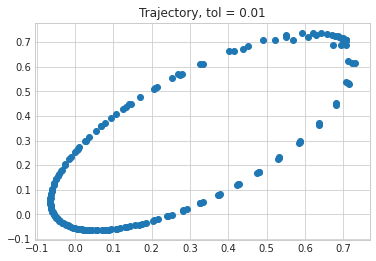

In [292]:
# Problem 2 orbiting

def orbit(t, y):
    x0 = y[0]
    x1 = y[1]
    norm = ((x0 ** 2) + (x1 ** 2)) ** 1.5
    res = [y[2], y[3], -x0 / norm, -x1 / norm] 
    return np.array(res)

orbittime = simTime(0, .01, 1.25, .8, .001, 1, 8)
startpos = np.array([.5 ** .5, .5 ** .5, -.3 * (.5 ** .5), .3 * (.5 ** .5)])
ot, oy, ost = chart(0, startpos, 8, orbit, orbittime)
#testx52, testy52, testst52 = chart(0, startpos, 2, orbit, strict)

xpoint = []
ypoint = []
for i in oy:
    xpoint.append(i[0])
    ypoint.append(i[1])
xSet = np.linspace(0, 2, 100)
ySet = xSet ** 5
fig = plt.figure()
ax = plt.axes()
#plt.plot(xSet, ySet)
plt.scatter(xpoint, ypoint, label = 'Tol = 0.01')
#plt.scatter(testx52, testy52, label = 'Tol = 0.001')
#plt.legend()
plt.title("Trajectory, tol = 0.01")

Text(0.5, 1.0, 'Energy, tol = 0.01')

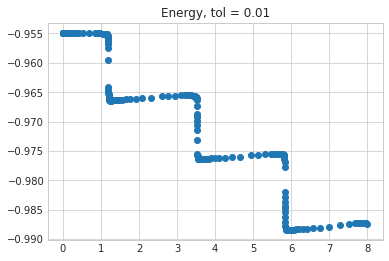

In [293]:
fig = plt.figure()
ax = plt.axes()

energies = []
for i in oy:
    energy = .5 * (((i[2] ** 2) + (i[3] ** 2))) - (1 / ((i[0] ** 2) + (i[1] ** 2)) ** .5)
    energies.append(energy)

plt.scatter(ot, energies, label = 'Tol = 0.01')
#plt.scatter(testx52, testy52, label = 'Tol = 0.001')
#plt.legend()
plt.title("Energy, tol = 0.01")

Text(0.5, 1.0, 'log of dt, tol = 0.01')

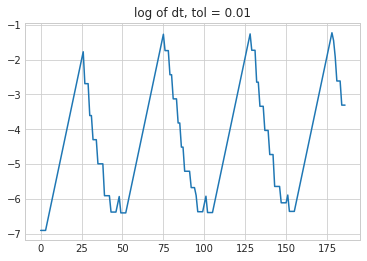

In [294]:
fig = plt.figure()
ax = plt.axes()
dts = list(map(lambda z: math.log(z[0] - z[1]), list(zip(ot[1:], ot))))
xlist = range(len(dts))
plt.plot(xlist, dts)
plt.title("log of dt, tol = 0.01")

Text(0.5, 1.0, 'Trajectory, tol = 0.001')

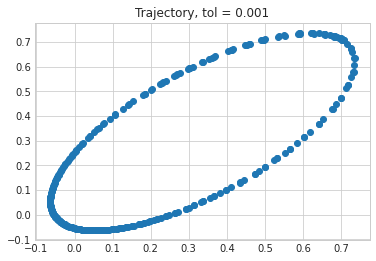

In [295]:
orbittime2 = simTime(0, .001, 1.25, .8, .001, 1, 8)
ot2, oy2, ost2 = chart(0, startpos, 8, orbit, orbittime2)
#testx52, testy52, testst52 = chart(0, startpos, 2, orbit, strict)

xpoint2 = []
ypoint2 = []
for i in oy2:
    xpoint2.append(i[0])
    ypoint2.append(i[1])
fig = plt.figure()
ax = plt.axes()
#plt.plot(xSet, ySet)
plt.scatter(xpoint2, ypoint2)
#plt.legend()
plt.title("Trajectory, tol = 0.001")

Text(0.5, 1.0, 'Energy, tol = 0.001')

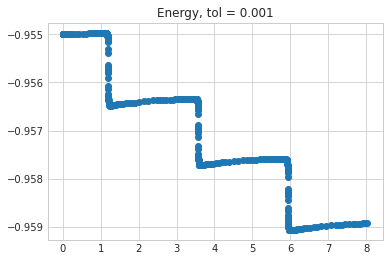

In [296]:
fig = plt.figure()
ax = plt.axes()

energies2 = []
for i in oy2:
    energy = .5 * (((i[2] ** 2) + (i[3] ** 2))) - (1 / ((i[0] ** 2) + (i[1] ** 2)) ** .5)
    energies2.append(energy)

plt.scatter(ot2, energies2)
plt.title("Energy, tol = 0.001")

Text(0.5, 1.0, 'log of dt, tol = 0.001')

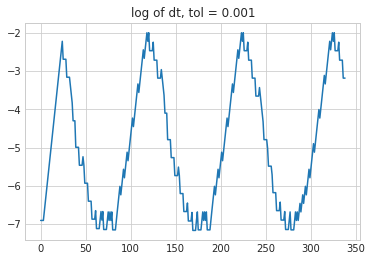

In [297]:
fig = plt.figure()
ax = plt.axes()
dts2 = list(map(lambda z: math.log(z[0] - z[1]), list(zip(ot2[1:], ot2))))
xlist = range(len(dts2))
plt.plot(xlist, dts2)
plt.title("log of dt, tol = 0.001")

Text(0.5, 1.0, 'Trajectory, tol = 0.0001')

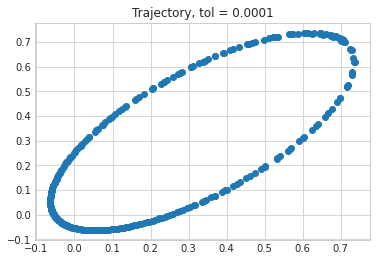

In [298]:
orbittime3 = simTime(0, .001, 1.25, .8, .0001, 1, 8)
ot3, oy3, ost3 = chart(0, startpos, 8, orbit, orbittime3)

xpoint3 = []
ypoint3 = []
for i in oy3:
    xpoint3.append(i[0])
    ypoint3.append(i[1])
fig = plt.figure()
ax = plt.axes()
plt.scatter(xpoint3, ypoint3)
plt.title("Trajectory, tol = 0.0001")

Text(0.5, 1.0, 'Energy, tol = 0.0001')

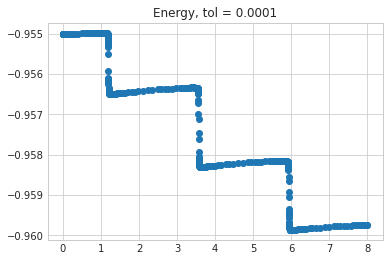

In [299]:
fig = plt.figure()
ax = plt.axes()

energies3 = []
for i in oy3:
    energy = .5 * (((i[2] ** 2) + (i[3] ** 2))) - (1 / ((i[0] ** 2) + (i[1] ** 2)) ** .5)
    energies3.append(energy)

plt.scatter(ot3, energies3)
plt.title("Energy, tol = 0.0001")

Text(0.5, 1.0, 'log of dt, tol = 0.0001')

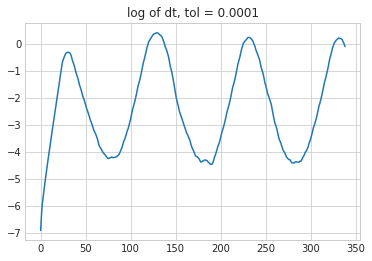

In [300]:
fig = plt.figure()
ax = plt.axes()
dts3 = list(map(lambda z: math.log(z[0] - z[1]), list(zip(ot2[1:], ot3))))
xlist = range(len(dts3))
plt.plot(xlist, dts3)
plt.title("log of dt, tol = 0.0001")